In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

In [3]:
df = pd.read_csv(r'E:\jupyter\Feature Engineering\Feature-Engineering-Live-sessions\titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.sample(5)


,Survived,Age,Fare
94,0,59.0,7.250
553,1,22.0,7.225
237,1,8.0,26.250
241,1,NaN,15.500
284,0,NaN,26.000


In [6]:

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
def impute_nan(df,variable):
    df[variable+"_hundred"] = df[variable].fillna(100)
    df[variable+"_zeros"] = df[variable].fillna(0)

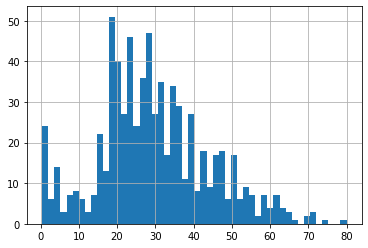

In [9]:
df['Age'].hist(bins=50)

### Arbitary values
#### 1. It should be more freuently present

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

### How To Handle Categroical Missing Values

##### Frequent Category Imputation

In [19]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
#salesprice is independent feature

In [20]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


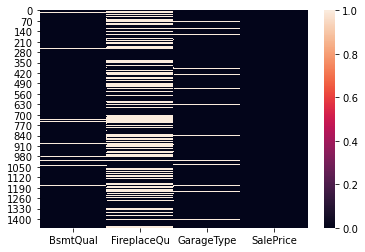

In [21]:
import seaborn as sns
sns.heatmap(df.isnull())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [23]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [24]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [25]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [28]:
df.shape

(1460, 4)

### Compute the frequency with every feature

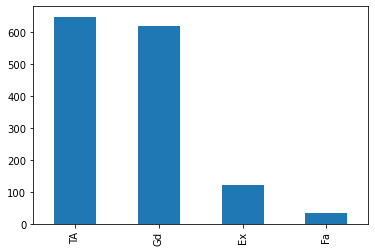

In [27]:
df['BsmtQual'].value_counts().plot.bar()

In [29]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

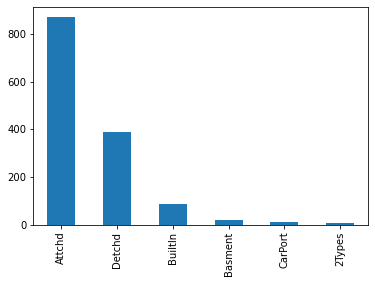

In [31]:
df['GarageType'].value_counts().plot.bar()

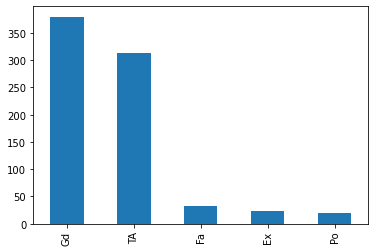

In [32]:
df['FireplaceQu'].value_counts().plot.bar()

In [33]:
### Replacing function
def impute_nan(df,variable):
    most_freq = df[variable].value_counts().index[0]
    df[variable].fillna(most_freq,inplace=True)

In [34]:
impute_nan(df,'GarageType')

In [37]:
df['GarageType'].isnull().sum()

0

In [38]:
for i in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df,i)

In [39]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [40]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


#### Advantages
1. Easy To implement
2. Fater way to implement
#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [18]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [20]:
df['BsmtQual_new'] = np.where(df['BsmtQual'].isnull(),1,0)

In [21]:
df[df['BsmtQual_new']==1]['BsmtQual_new'].sum()

37

In [22]:
frequent = df['BsmtQual'].mode()[0]

In [23]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [24]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_new      0
dtype: int64

In [26]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)

df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_new        0
FireplaceQu_var     0
dtype: int64

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [42]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [44]:
def impute_nan(df,variable):
    df[variable+"new"] = np.where(df[variable].isnull(),'Missing',df[variable])

In [45]:
for i in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df,i)

In [46]:
df.isnull().sum()

BsmtQual           37
FireplaceQu       690
GarageType         81
SalePrice           0
BsmtQualnew         0
FireplaceQunew      0
GarageTypenew       0
SalePricenew        0
dtype: int64

In [48]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType','SalePrice'],axis=1)

In [49]:
df.head()

,BsmtQualnew,FireplaceQunew,GarageTypenew,SalePricenew
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
